In [954]:
import pandas as pd
import datetime
import numpy as np
from itertools import chain
import warnings
import matplotlib.pyplot as plt
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from pandas.tseries.offsets import DateOffset, Day, CustomBusinessMonthEnd, CustomBusinessDay

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)


## Задание 1


In [590]:
work_calendar = pd.read_csv('./data-20181017t0930-structure-20181017t0930_5.csv',
                            usecols=[i for i in range(13)], index_col=0)
work_calendar

,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
Год/Месяц,,,,,,,,,,,,
1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*"
2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31"
2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30"
2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*"
2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*"
2004,"1,2,3,4,6*,7,10,11,17,18,24,25,31","1,7,8,14,15,21,22,23,28,29","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*"
2005,"1,2,3,4,5,6,7,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,22*,23,26,27","5*,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,2,7,8,9,14,15,21,22,28,29","4,5,11,12,13,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29,30","3*,4,5,6,12,13,19,20,26,27","3,4,10,11,17,18,24,25,31"
2006,"1,2,3,4,5,6,7,8,9,14,15,21,22,28,29","4,5,11,12,18,19,22*,23,24,25","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,6*,7,8,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","3*,4,5,6,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31"
2007,"1,2,3,4,5,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,22*,23,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28*,29,30","1,5,6,8*,9,12,13,19,20,26,27","2,3,9*,10,11,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,5,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29*,30,31"


#### На основе производственного календаря создаем 3 датафрейма, содержащие три типа дат: рабочие дни перед праздниками, выходные/праздники, сдвинутые прездники

In [591]:
df = work_calendar.applymap(lambda x: x.split(','))
df.columns = np.arange(1, 13)


def pre_holidays_map(dates):
    l = [int(d[:-1]) for d in dates if d.endswith('*')]
    return l if len(l) else [None]


def shifted_holidays_map(dates):
    l = [int(d[:-1]) for d in dates if d.endswith('+')]
    return l if len(l) else [None]


def weekend_holiday_map(dates):
    return [int(d) for d in dates if not d.endswith('*') and not d.endswith('+')]


pre_holidays = df.applymap(pre_holidays_map)
shifted_holidays = df.applymap(shifted_holidays_map)
weekends_or_holidays = df.applymap(weekend_holiday_map)

pre_holidays

,1,2,3,4,5,6,7,8,9,10,11,12
Год/Месяц,,,,,,,,,,,,
1999,[6],[None],[None],[30],[None],[11],[None],[None],[None],[None],[None],[31]
2000,[6],[None],[7],[None],[8],[None],[None],[None],[None],[None],[None],[11]
2001,[None],[None],[7],[30],[8],[11],[None],[None],[None],[None],[6],[None]
2002,[None],[22],[7],[30],[8],[11],[None],[None],[None],[None],[6],"[11, 31]"
2003,[5],[None],[7],[30],[8],[11],[None],[None],[None],[None],[6],"[11, 31]"
2004,[6],[None],[None],[30],[None],[11],[None],[None],[None],[None],[None],[31]
2005,[None],[22],[5],[None],[None],[None],[None],[None],[None],[None],[3],[None]
2006,[None],[22],[7],[None],[6],[None],[None],[None],[None],[None],[3],[None]
2007,[None],[22],[7],[28],[8],[9],[None],[None],[None],[None],[None],[29]


#### Cоздаем список с таймстемпами рабочих дняй перед праздниками и 2 списка с объектами Holiday для праздников, на основе них - рулы для кастомного календаря

In [592]:
pre_h = list(filter(None, [pd.Timestamp(year, month, day)
                           if day is not None else None
                           for year in pre_holidays.index
                           for month in pre_holidays.columns
                           for day in pre_holidays.loc[year][month]]))

worh = [Holiday(name='Weekend_or_Holiday', year=year, month=month, day=day)
        for year in weekends_or_holidays.index
        for month in weekends_or_holidays.columns
        for day in weekends_or_holidays.loc[year][month]]
sh_h = [Holiday(name='Shifted_holiday', year=year, month=month, day=day)
        if day is not None else None
        for year in shifted_holidays.index
        for month in shifted_holidays.columns
        for day in shifted_holidays.loc[year][month]]

rules = list(filter(None, [*worh, *sh_h]))

#### Создаем кастомный бизнес-календарь 1999-2000x годов и объект CustomBusinessMonthEnd, задающий последние рабочие дни месяца с учетом праздников(рулов)

In [593]:
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2025, 12, 31)
    rules = rules

# russian_calendar = CustomBusinessDay(
    calendar=RussianBusinessCalendar())

business_month_ends = CustomBusinessMonthEnd(holidays=rules)

#### Создаем итоговый датафрейм-календарь с заданными колонками, заполняем нулями

In [594]:
m_names = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь',
           'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
wd_names = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']
d_types = ['выходной', 'праздник', 'предпраздничный рабочий день',
           'последний день месяца', 'последний рабочий день месяца']
cols = [*d_types, *wd_names, *m_names, 'Предновогодний выходной день']

custom_calendar = pd.DataFrame(columns=cols, index=pd.date_range(
    start='1999-01-01', end='2025-12-31', freq='D'))
custom_calendar = custom_calendar.fillna(0)

#### Создаем daterange-фильтры по датам для заданных типов дней

In [595]:
holiday_dates = [*['1999-01-0{}'.format(i) for i in range(1, 9)], '1999-02-23', '1999-03-08', '1999-05-01',
                 '1999-05-09', '1999-06-12', '1999-11-04']
official_holidays = [pd.date_range(start=d, end='2025-12-31',
                                   freq=DateOffset(years=1)) for d in holiday_dates]
official_holidays = list(chain(*official_holidays))
new_year_eves = pd.date_range(start='2000-12-31', end='2025-12-31',
                              freq=DateOffset(years=1))
bus_month_ends = pd.date_range(
    start='1999-01-01', end='2025-12-31', freq=business_month_ends)

#### Заполняем колонки типов дней календаря единицами, используя фильтры, а так же колонки дней недели и месяцев 

In [596]:
custom_calendar.loc[russian_calendar.holidays, [
    'выходной']] = 1
custom_calendar.loc[official_holidays, ['праздник']] = 1
custom_calendar.loc[official_holidays, ['выходной']] = 1
custom_calendar.loc[new_year_eves, ['Предновогодний выходной день']] = 1
custom_calendar.loc[custom_calendar.index.is_month_end ==
                    True, ['последний день месяца']] = 1
custom_calendar.loc[bus_month_ends, ['последний рабочий день месяца']] = 1
custom_calendar.loc[pre_h, ['предпраздничный рабочий день']] = 1

for i, v in enumerate(m_names):
    custom_calendar.loc[custom_calendar.index.month == i+1, [v]] = 1

for i, v in enumerate(wd_names):
    custom_calendar.loc[custom_calendar.index.dayofweek == i, [v]] = 1

In [923]:
custom_calendar

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,...,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день
1999-01-01,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1999-01-02,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-03,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-04,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-05,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-29,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-30,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Задание 2

#### Загрузим таблицу акций. Заметим, что в ней отсутствуют данные за выходные

In [1031]:
ts = pd.read_csv('./data/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
ts = ts.CLOSE
ts.index[25:40]

DatetimeIndex(['2013-04-29', '2013-04-30', '2013-05-02', '2013-05-03',
               '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-10',
               '2013-05-13', '2013-05-14', '2013-05-15', '2013-05-16',
               '2013-05-17', '2013-05-20', '2013-05-21'],
              dtype='datetime64[ns]', name='TRADEDATE', freq=None)

#### Добавляем в таблицу данные по выходным, заполних их первыми предыдущими имеющимися значениями. Создаем финальную таблицу для статистик

In [1072]:
ts = ts.asfreq(pd.offsets.Day()).fillna(method='pad')

sber_stocks = pd.DataFrame(ts)
sber_stocks.head(30)

,CLOSE
TRADEDATE,
2013-03-25,98.79
2013-03-26,97.20
2013-03-27,96.75
2013-03-28,98.59
2013-03-29,98.76
2013-03-30,98.76
2013-03-31,98.76
2013-04-01,98.07
2013-04-02,98.93


#### Добавляем в таблицу lag статистику

In [1091]:
shifts = [[s for s in ts1.shift(i, freq=russian_calendar)] for i in range(1, 6, 2)]
sber_stocks['LAG 1'], sber_stocks['LAG 3'], sber_stocks['LAG 5'] = shifts

sber_stocks.head(30)

,CLOSE,LAG 1,LAG 3,LAG 5
TRADEDATE,,,,
2013-03-25,98.79,98.79,98.79,98.79
2013-03-26,97.20,97.20,97.20,97.20
2013-03-27,96.75,96.75,96.75,96.75
2013-03-28,98.59,98.59,98.59,98.59
2013-03-29,98.76,98.76,98.76,98.76
2013-03-30,98.76,98.76,98.76,98.76
2013-03-31,98.76,98.76,98.76,98.76
2013-04-01,98.07,98.07,98.07,98.07
2013-04-02,98.93,98.93,98.93,98.93


#### Добавляем скользящие статистики ['mean', 'median', 'max', 'min', 'std'] с окнами 1, 3, 5 сгрупированные по дням недели


In [1092]:
weekday_group =  sber_stocks.groupby(sber_stocks.index.dayofweek)['CLOSE']

for i in range(1, 6, 2):
    sber_stocks['ROLLING MEAN {}'.format(i)] = weekday_group.transform(
        lambda x: x.rolling(window=i).mean().shift(1))
    sber_stocks['ROLLING MEDIAN {}'.format(i)] = weekday_group.transform(
        lambda x: x.rolling(window=i).median().shift(1))
    sber_stocks['ROLLING MAX {}'.format(i)] = weekday_group.transform(
        lambda x: x.rolling(window=i).max().shift(1))
    sber_stocks['ROLLING MIN {}'.format(i)] = weekday_group.transform(
        lambda x: x.rolling(window=i).min().shift(1))
    sber_stocks['ROLLING STD {}'.format(i)] = weekday_group.transform(
        lambda x: x.rolling(window=i).std().shift(1))
sber_stocks

,CLOSE,LAG 1,LAG 3,LAG 5,ROLLING MEAN 1,ROLLING MEDIAN 1,ROLLING MAX 1,ROLLING MIN 1,ROLLING STD 1,ROLLING MEAN 3,ROLLING MEDIAN 3,ROLLING MAX 3,ROLLING MIN 3,ROLLING STD 3,ROLLING MEAN 5,ROLLING MEDIAN 5,ROLLING MAX 5,ROLLING MIN 5,ROLLING STD 5
TRADEDATE,,,,,,,,,,,,,,,,,,,
2013-03-25,98.79,98.79,98.79,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-26,97.20,97.20,97.20,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-27,96.75,96.75,96.75,96.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-28,98.59,98.59,98.59,98.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-29,98.76,98.76,98.76,98.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,253.90,253.90,253.90,253.90,254.75,254.75,254.75,254.75,NaN,248.333333,248.80,254.75,241.45,6.662269,243.162,241.45,254.75,233.77,8.583244
2020-01-07,253.90,253.90,253.90,253.90,254.75,254.75,254.75,254.75,NaN,248.340000,248.67,254.75,241.60,6.581208,242.718,241.60,254.75,230.66,9.353575
2020-01-08,259.15,259.15,259.15,259.15,254.75,254.75,254.75,254.75,NaN,249.663333,248.04,254.75,246.20,4.500226,244.180,246.20,254.75,231.59,8.719412


#### Создаем группы для 3 типов дней на основе нашего кастомного календаря и таблицы нашего календаря

In [1093]:
stock_fday = sber_stocks.index.min()
stock_lday = sber_stocks.index.max()

stock_holidays = custom_calendar[stock_fday:
                                 stock_lday][custom_calendar['праздник'] == 1]['праздник'].index

stock_work_days_before_holiday = custom_calendar[stock_fday:stock_lday][custom_calendar[
    'предпраздничный рабочий день'] == 1]['предпраздничный рабочий день'].index

stock_work_days = pd.date_range(start=sber_stocks.index.min(
), end=sber_stocks.index.max(), freq=russian_calendar)


<ipython-input-1093-d5df9ad84c4f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stock_holidays = custom_calendar[stock_fday:
<ipython-input-1093-d5df9ad84c4f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stock_work_days_before_holiday = custom_calendar[stock_fday:stock_lday][custom_calendar[


#### Добавляем статистики ['mean', 'median', 'max', 'min', 'std'] в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

In [1094]:
day_groups = {'WD': stock_work_days, 'WD BEFORE HOLIDAY': stock_work_days_before_holiday, 'HOLIDAY': stock_holidays}

for k in day_groups.keys():
    sber_stocks['EXPAND {} MEAN'.format(k)] = sber_stocks.loc[day_groups[k], 'CLOSE'].transform(
        lambda x: x.expanding().mean().shift(1))
    sber_stocks['EXPAND {} MEDIAN'.format(k)] = sber_stocks.loc[day_groups[k], 'CLOSE'].transform(
        lambda x: x.expanding().median().shift(1))
    sber_stocks['EXPAND {} MAX'.format(k)] = sber_stocks.loc[day_groups[k], 'CLOSE'].transform(
        lambda x: x.expanding().max().shift(1))
    sber_stocks['EXPAND {} MIN'.format(k)] = sber_stocks.loc[day_groups[k], 'CLOSE'].transform(
        lambda x: x.expanding().min().shift(1))
    sber_stocks['EXPAND {} STD'.format(k)] = sber_stocks.loc[day_groups[k], 'CLOSE'].transform(
        lambda x: x.expanding().std().shift(1))

In [1095]:
sber_stocks

,CLOSE,LAG 1,LAG 3,LAG 5,ROLLING MEAN 1,ROLLING MEDIAN 1,ROLLING MAX 1,ROLLING MIN 1,ROLLING STD 1,ROLLING MEAN 3,...,EXPAND WD BEFORE HOLIDAY MEAN,EXPAND WD BEFORE HOLIDAY MEDIAN,EXPAND WD BEFORE HOLIDAY MAX,EXPAND WD BEFORE HOLIDAY MIN,EXPAND WD BEFORE HOLIDAY STD,EXPAND HOLIDAY MEAN,EXPAND HOLIDAY MEDIAN,EXPAND HOLIDAY MAX,EXPAND HOLIDAY MIN,EXPAND HOLIDAY STD
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2013-03-25,98.79,98.79,98.79,98.79,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-26,97.20,97.20,97.20,97.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-27,96.75,96.75,96.75,96.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-28,98.59,98.59,98.59,98.59,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-29,98.76,98.76,98.76,98.76,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,253.90,253.90,253.90,253.90,254.75,254.75,254.75,254.75,NaN,248.333333,...,NaN,NaN,NaN,NaN,NaN,149.954301,150.130,277.49,54.9,65.801754
2020-01-07,253.90,253.90,253.90,253.90,254.75,254.75,254.75,254.75,NaN,248.340000,...,NaN,NaN,NaN,NaN,NaN,151.060106,155.555,277.49,54.9,66.319354
2020-01-08,259.15,259.15,259.15,259.15,254.75,254.75,254.75,254.75,NaN,249.663333,...,NaN,NaN,NaN,NaN,NaN,152.142632,160.980,277.49,54.9,66.804143


#### Покажем некоторые статистики на графиках

<AxesSubplot:xlabel='TRADEDATE'>

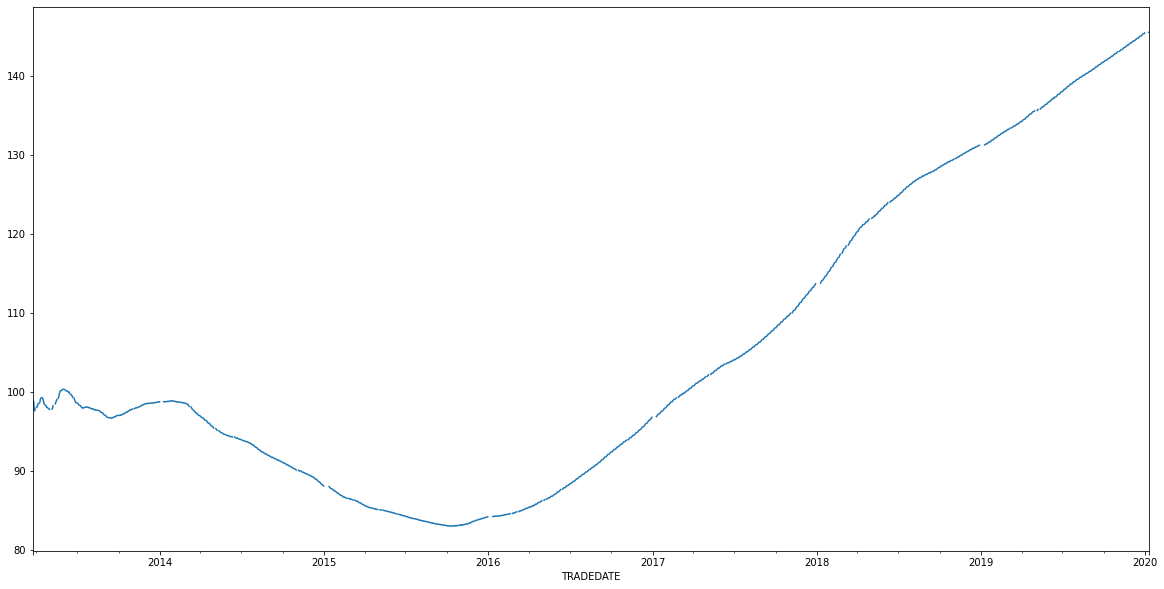

In [1046]:
sber_stocks['EXPAND WD MEAN'].plot(figsize=(20, 10))

<AxesSubplot:xlabel='TRADEDATE'>

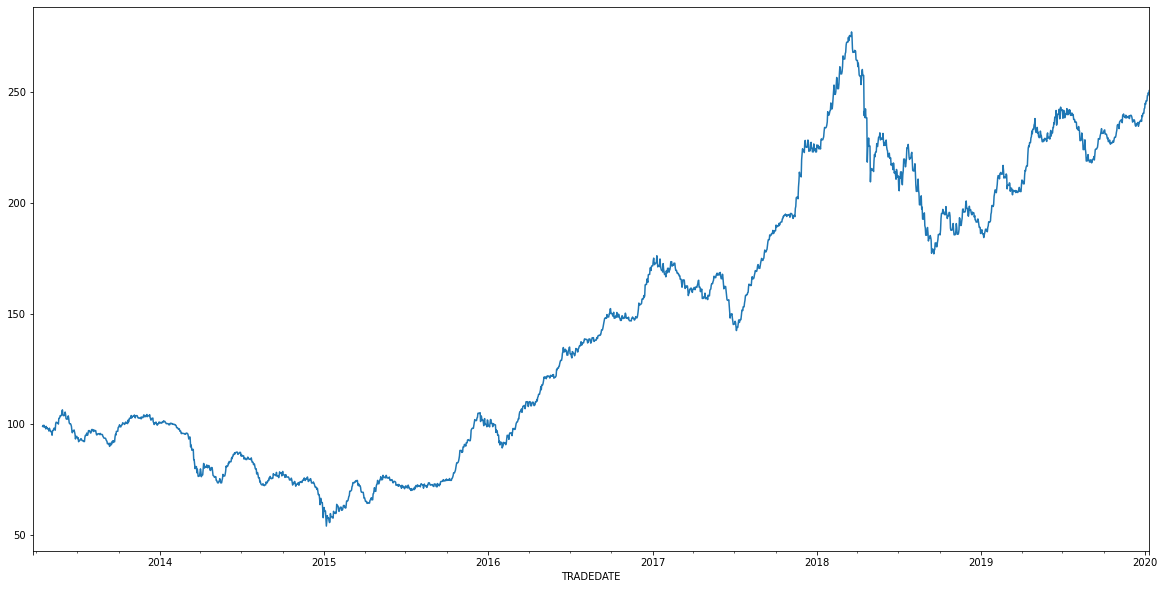

In [1043]:
sber_stocks['ROLLING MEAN 3'].plot(figsize=(20, 10))

<AxesSubplot:xlabel='TRADEDATE'>

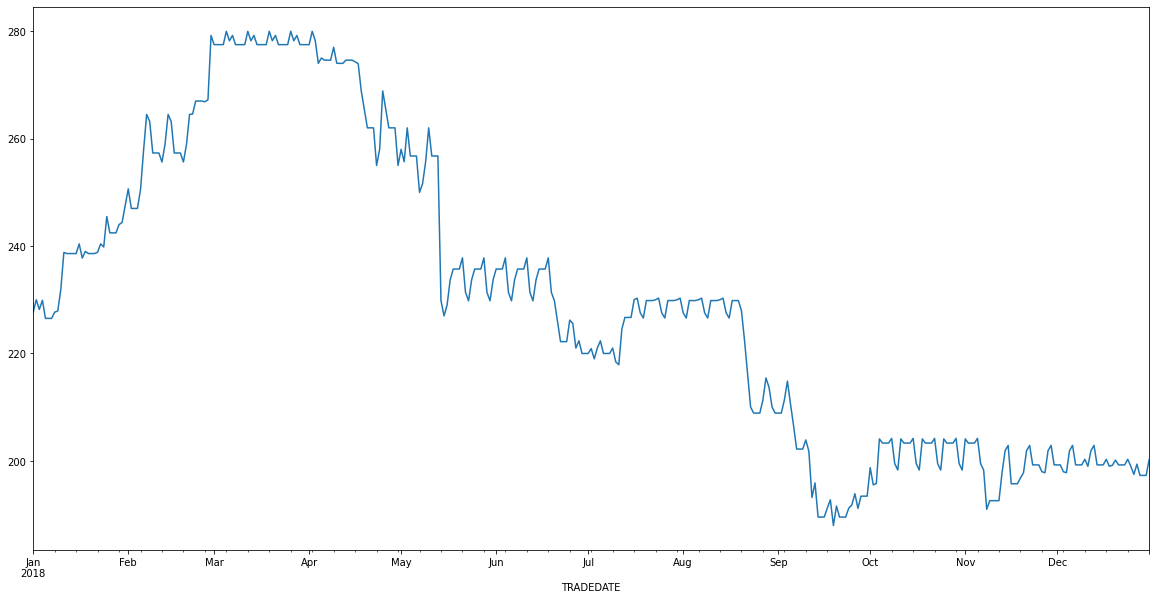

In [1044]:
sber_stocks.loc['2018']['ROLLING MAX 5'].plot(figsize=(20, 10))